# Supervised Learning Capstone Project - Tree Methods Focus


## GOAL: Create a model to predict whether or not a customer will Churn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/Telco-Customer-Churn.csv')

In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7031,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


##Quick Data Check



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Exploratory Data Analysis

## General Feature Exploration

In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


<Axes: xlabel='Churn', ylabel='count'>

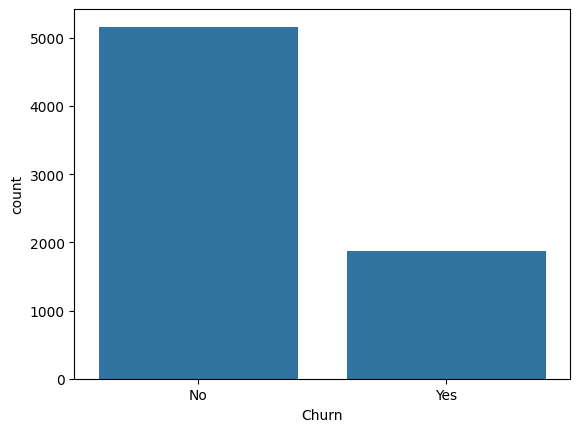

In [ ]:
sns.countplot(x='Churn',data=df)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

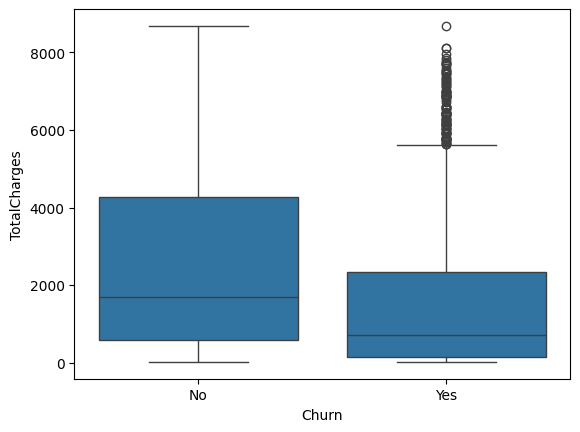

In [ ]:
sns.boxplot(x='Churn',y='TotalCharges',data=df)

<Axes: xlabel='Contract', ylabel='TotalCharges'>

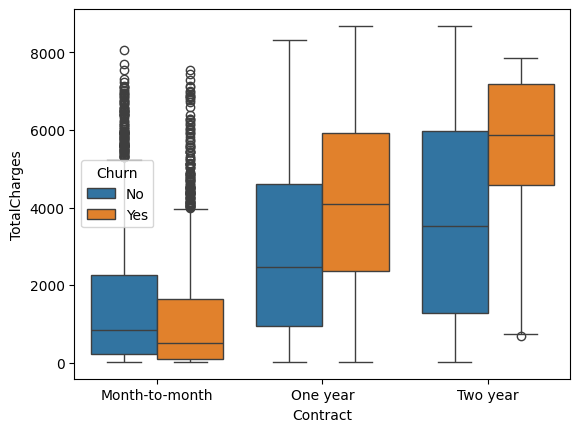

In [ ]:
sns.boxplot(x='Contract',y='TotalCharges',data=df,hue='Churn')

##Correlation with target label

In [ ]:
cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines',
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [ ]:
object_df=df[cols]
object_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,InternetService,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,No,Yes,No,No,DSL,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,Yes,No,Yes,No,DSL,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,Yes,Yes,No,No,DSL,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,Yes,No,Yes,Yes,DSL,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,No,No,No,No,Fiber optic,No,No,Month-to-month,Yes,Electronic check


In [ ]:
dummies=pd.get_dummies(object_df,dtype=int)
dummies.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,1,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,1,0,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,1,0,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
dummies['Churn']=df['Churn']

In [ ]:
dummies.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,0,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,No
1,0,0,1,1,0,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,No
2,0,0,1,1,0,1,0,0,1,1,...,1,0,0,0,1,0,0,0,1,Yes
3,0,0,1,1,0,1,0,1,0,0,...,0,1,0,1,0,1,0,0,0,No
4,0,1,0,1,0,1,0,0,1,1,...,1,0,0,0,1,0,0,1,0,Yes


In [ ]:
dummies['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [ ]:
dummies.corr()['Churn'].sort_values(ascending=True)

,Churn
Contract_Two year,-0.301552
OnlineSecurity_No internet service,-0.227578
StreamingMovies_No internet service,-0.227578
TechSupport_No internet service,-0.227578
InternetService_No,-0.227578
OnlineBackup_No internet service,-0.227578
DeviceProtection_No internet service,-0.227578
StreamingTV_No internet service,-0.227578
PaperlessBilling_No,-0.191454
Contract_One year,-0.178225


---
---

#  Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**3 contract types available?**

In [ ]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Creating a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<Axes: xlabel='tenure', ylabel='Count'>

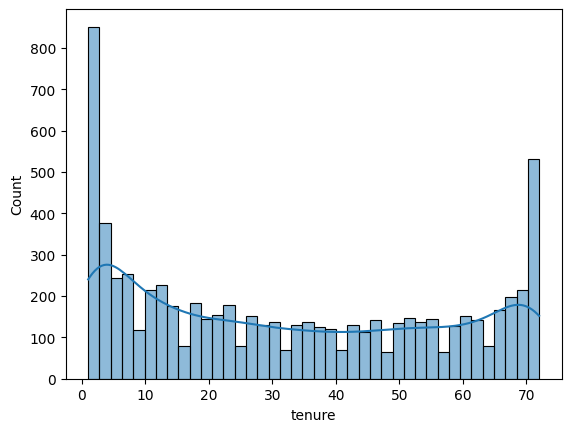

In [ ]:
sns.histplot(df['tenure'],kde=True,bins=40)

**creating a histograms separated by two additional features, Churn and Contract.**

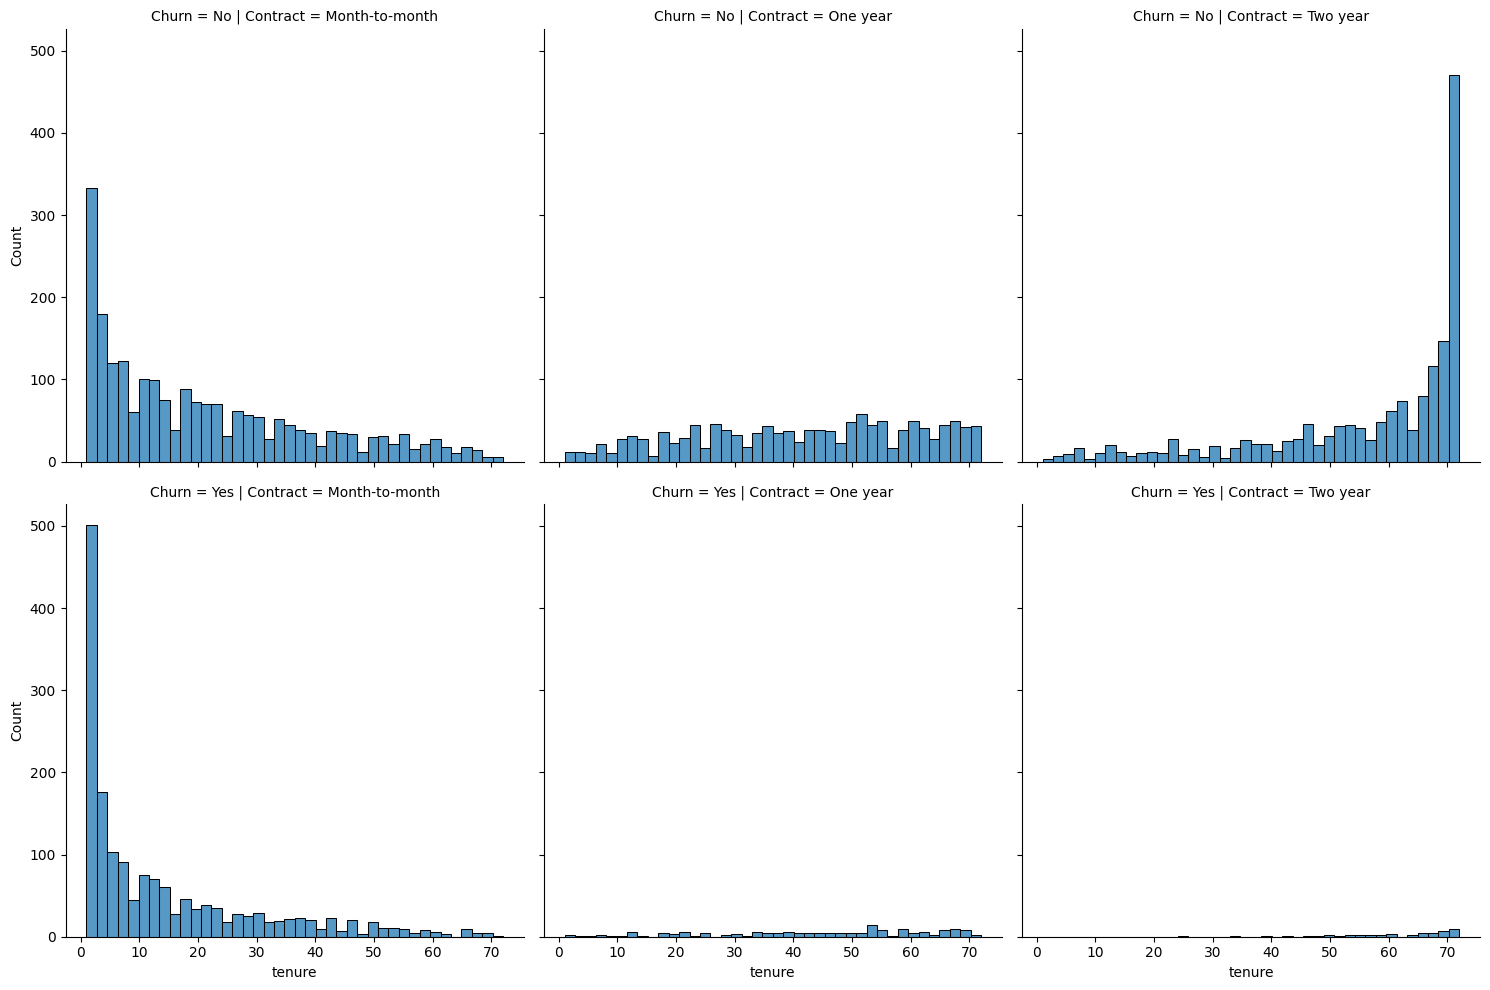

In [ ]:

sns.displot(data=df,x='tenure',bins=40,col='Contract',row='Churn')


**Displaying a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

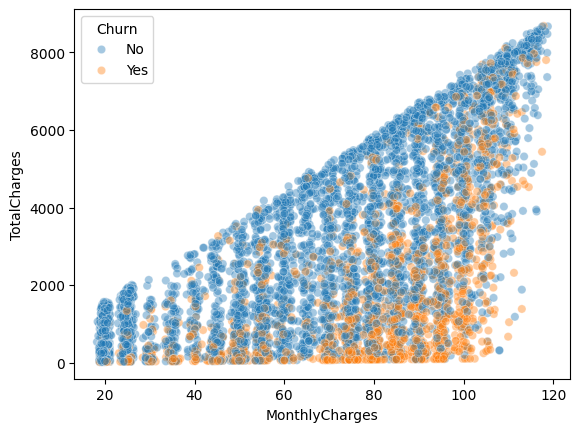

In [ ]:
sns.scatterplot(y='TotalCharges',x='MonthlyCharges',hue='Churn',data=df,alpha=0.4)

<img src='fig7.png'>

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort.**

In [ ]:
df1=df.copy()

In [ ]:
churn_rate_per_month=df.groupby('tenure')['Churn'].apply(lambda x: (x=='Yes').mean())*100

In [ ]:
churn_rate_per_month

,Churn
tenure,
1,61.990212
2,51.680672
3,47.000000
4,47.159091
5,48.120301
...,...
68,9.000000
69,8.421053
70,9.243697


Text(0.5, 1.0, 'Churn Rate per Tenure')

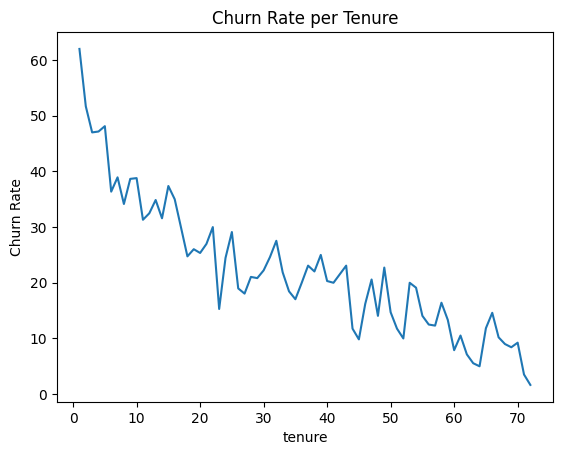

In [ ]:
ax=sns.lineplot(x=churn_rate_per_month.index,y=churn_rate_per_month.values)
ax.set_ylabel('Churn Rate')
ax.set_title('Churn Rate per Tenure')

### Broader Cohort Groups
**Based on the tenure column values, createing a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [ ]:
def tenure_cohort(tenure):
  if tenure<=12:
    return '0-12 Months'
  elif tenure<=24:
    return '12-24 Months'
  elif tenure<=48:
    return '24-48 Months'
  else:
    return 'Over 48 Months'

In [ ]:
df['Tenure Cohort']=df['tenure'].apply(tenure_cohort)

In [ ]:
df[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


**Creating a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

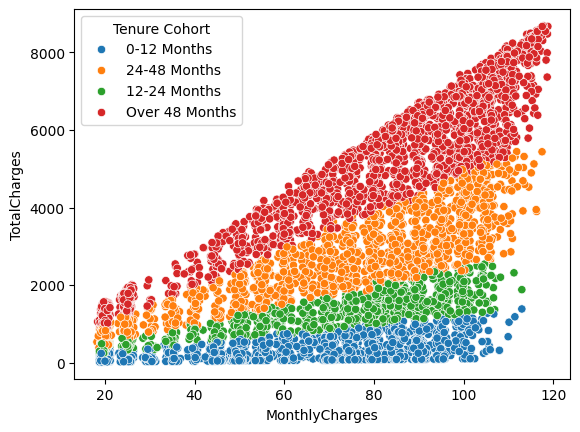

In [ ]:
sns.scatterplot(y='TotalCharges',x='MonthlyCharges',hue='Tenure Cohort',data=df)

**Creating a count plot showing the churn count per cohort.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

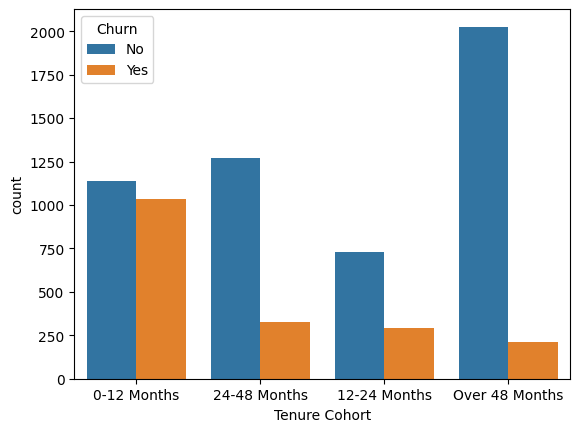

In [ ]:
sns.countplot(x='Tenure Cohort',hue='Churn',data=df)

**Creating a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

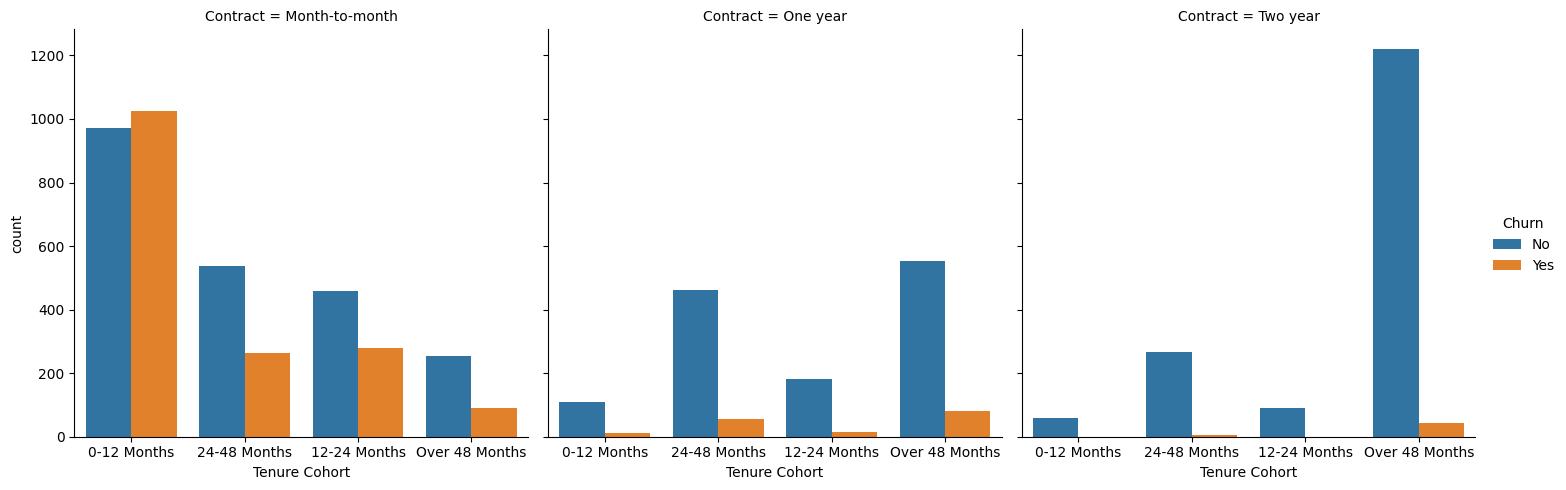

In [ ]:
sns.catplot(x='Tenure Cohort',col='Contract',hue='Churn',data=df,kind='count')

-----

# Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.**


## Single Decision Tree

**Separating out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [40]:
X=df.drop(['Churn','customerID'],axis=1) # incase of  predictive model  delete the feature  which can't convert into dummy like customerID
X=pd.get_dummies(X,drop_first=True,dtype=int)
y=df['Churn']

**Perform a train test split, holding out 10% of the data for tessting.**

In [38]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Decision Tree Perfomance.**
   1. Training a single decision tree model .
   2. Evaluating performance metrics from decision tree, including classification report and plotting a confusion matrix.
   3. Calculating feature importances from the decision tree.
   

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
params_grid={'max_depth':np.arange(1,10)}

In [46]:
grid=GridSearchCV(DecisionTreeClassifier(),param_grid=params_grid,cv=5)

In [47]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [49]:
y_pred=grid.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



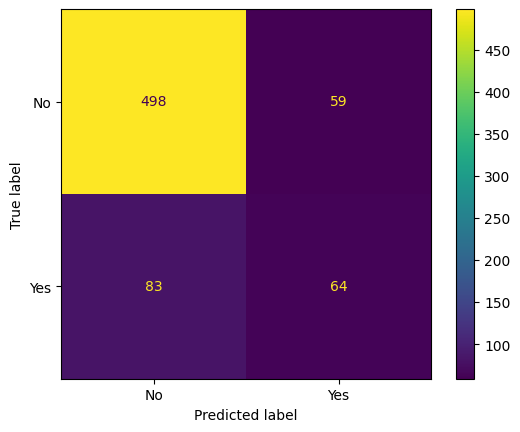

In [53]:
ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test)

In [56]:
feature_importance=grid.best_estimator_.feature_importances_

In [57]:
feature_importance_df=pd.DataFrame({'feature':X_train.columns,'importance':feature_importance})

In [58]:
sorted_feature_importance_df=feature_importance_df.sort_values('importance',ascending=False)

<Axes: xlabel='importance', ylabel='feature'>

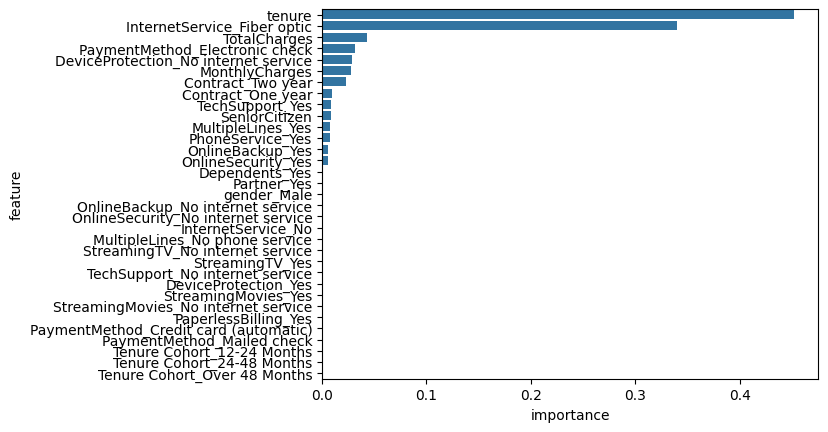

In [60]:
sns.barplot(data=sorted_feature_importance_df,x='importance',y='feature')

## Random Forest

**Creating a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
random_forest=RandomForestClassifier()

In [70]:
y_pred=random_forest.predict(X_test)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.51      0.45      0.48       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



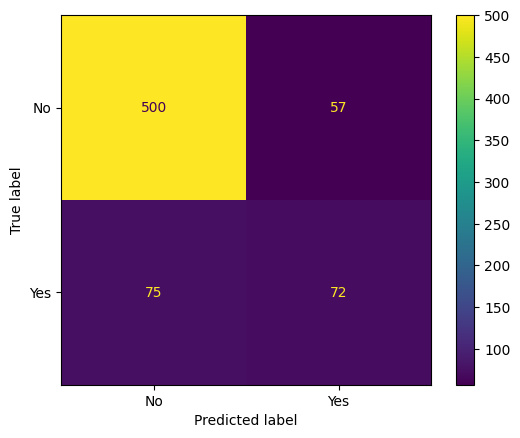

In [73]:
ConfusionMatrixDisplay.from_estimator(random_forest,X_test,y_test)

## Boosted Trees

**Using AdaBoost and Gradient Boosting and  classification report and plot a confusion matrix for its predicted results**

In [67]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [74]:
adaboost_model=AdaBoostClassifier()

In [75]:
adaboost_model.fit(X_train,y_train)

AdaBoostClassifier()

In [76]:
y_pred=adaboost_model.predict(X_test)

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.60      0.51      0.55       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



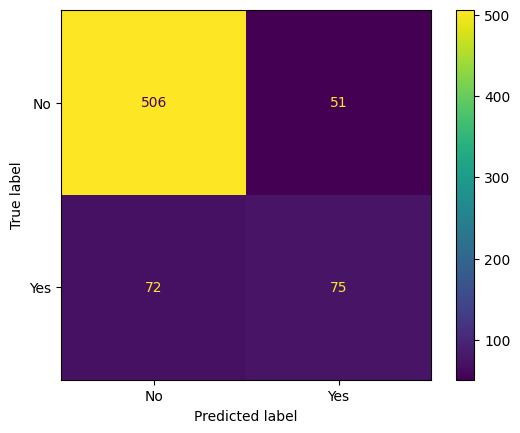

In [78]:
ConfusionMatrixDisplay.from_estimator(adaboost_model,X_test,y_test)

**Analyzsis**
###so the base model(Decisiontree)  is performing well among all the models